In [1]:
import xarray

Open Dask cluster,

In [2]:
%%time
import dask.distributed
cluster = dask.distributed.LocalCluster(
    n_workers=1,
    threads_per_worker=2,
    memory_limit='10GB',
    ip='0.0.0.0')

CPU times: user 362 ms, sys: 70.3 ms, total: 433 ms
Wall time: 1.52 s


In [3]:
# %%time
# import dask_gateway, dask.distributed
# gateway = dask_gateway.Gateway(
#     "http://...")
# cluster = gateway.new_cluster(worker_cores=2)
# cluster.scale(1)

In [4]:
client = dask.distributed.Client(cluster); client

Connection method: Cluster object,Cluster type: LocalCluster
Dashboard: /user/user1/proxy/8787/status,
Status: running,Using processes: True
Dashboard: /user/user1/proxy/8787/status,Workers: 1
Total threads: 2,Total memory: 7.78 GiB
Comm: tcp://10.0.0.14:37803,Workers: 1
Dashboard: /user/user1/proxy/8787/status,Total threads: 2
Started: Just now,Total memory: 7.78 GiB
Comm: tcp://10.0.0.14:45241,Total threads: 2
Dashboard: /user/user1/proxy/37653/status,Memory: 7.78 GiB
Nanny: tcp://10.0.0.14:33629,


Open VIKING20X dataset,

In [5]:
dataset = xarray.open_zarr(
    'gs://.../VIKING20X.L46-KFS003_1m_grid_T.zarr',
)

In [6]:
dataset

<xarray.Dataset>
Dimensions:        (deptht: 46, time_counter: 744, x: 1442, y: 1021)
Coordinates:
  * deptht         (deptht) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
  * time_counter   (time_counter) datetime64[ns] 1958-01-16T12:00:00 ... 2019...
Dimensions without coordinates: x, y
Data variables:
    nav_lat        (y, x) float32 dask.array<chunksize=(1021, 1442), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1021, 1442), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(744,), meta=np.ndarray>
    vosaline       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 46, 1021, 1442), meta=np.ndarray>
    votemper       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 46, 1021, 1442), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.6 (Homepage = http://nco.sf.ne...
    description:  ocean T grid variables
    history:      Mon Dec 21 12:11:01 2020: ncrcat VIKING20X.L46-KFS003_1m_19...
    name:         /p/scratch/viking/schwarzkopf1/VIKING20X.L46/VIKING20X.L46-...
    timeStamp:    2020-Dec-14 16:29:49 GMT
    title:        ocean T grid variables
    uuid:         6c2d0ef4-3b87-4d4d-b979-e93787242e66

Example plot,

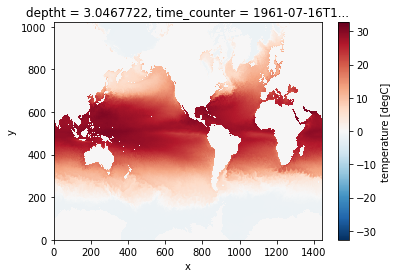

In [9]:
dataset.isel(time_counter=42, deptht=0).votemper.plot();

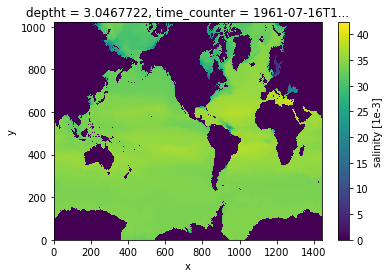

In [10]:
dataset.isel(time_counter=42, deptht=0).vosaline.plot();

Python packages,

In [11]:
pip list

Package                       Version
----------------------------- --------------------------
adal                          1.2.7
adlfs                         2021.7.1
affine                        2.3.0
aiobotocore                   1.3.3
aiohttp                       3.7.4.post0
aioitertools                  0.7.1
alembic                       1.6.5
amqp                          5.0.6
anyio                         3.2.1
appdirs                       1.4.4
argon2-cffi                   20.1.0
asciitree                     0.3.3
asgiref                       3.4.1
asn1crypto                    1.4.0
astropy                       4.2.1
async-generator               1.10
async-timeout                 3.0.1
attrs                         21.2.0
av                            8.0.3
awscli                        1.19.106
azure-core                    1.14.0
azure-datalake-store          0.0.51
azure-identity                1.6.0
azure-storage-blob            12.8.1
Babel                    

In [12]:
!conda list --explicit

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
@EXPLICIT
https://conda.anaconda.org/conda-forge/linux-64/gh-1.12.1-ha8f183a_1.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/nomkl-1.0-h5ca1d4c_0.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/_libgcc_mutex-0.1-conda_forge.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/ca-certificates-2021.5.30-ha878542_0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/font-ttf-dejavu-sans-mono-2.37-hab24e00_0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/font-ttf-inconsolata-3.000-h77eed37_0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/font-ttf-source-code-pro-2.038-h77eed37_0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/font-ttf-ubuntu-0.83-hab24e00_0.tar.bz2
https://conda.anaconda.org/conda-forge/noarch/kernel-headers_linux-64-2.6.32-he073ed8_14.tar.bz2
https://conda.anaconda.org/conda-forge/linux-64/ld_impl_linux-64-2